# Text Classification

From [here](https://www.tensorflow.org/tutorials/keras/basic_text_classification)

In [3]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

1.10.0


## Download the IMDB dataset

In [5]:
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

## Explore the data

In [9]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))
print("{0}, {1}".format(len(train_data[0]), len(train_data[1])))

Training entries: 25000, labels: 25000
218, 189


## Convert integers to words

In [11]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [12]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

## Prepare the data

In [13]:
# We need to pad all the arrays so they have the same length
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [14]:
len(train_data[0]), len(train_data[1])

(256, 256)

## Build the model

In [16]:
# input shape is the vocab count used for the movie reviews
vocab_size = 10000

model = keras.Sequential()
'''This layer takes integer-encoded vocab and looks up embedding
vector for each word-index. These vectors are learned as model is
trained. The vector adds a dimension to output array. Resulting
dimensions are (batch, sequence, embedding)'''
model.add(keras.layers.Embedding(vocab_size, 16))
'''This layer returns a fixed-length output vector for each vector
by averaging over sequence dimension. This allows model to take input
of variable length'''
model.add(keras.layers.GlobalAveragePooling1D())
'''Fully connected layer with 16 hidden units'''
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
'''value is float between 0 and 1 representing confidence'''
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


## Loss function and optimizer

In [25]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='binary_crossentropy',
             metrics=['accuracy'])

## Create a validation set

In [26]:
'''Create a validation set by setting apart 10,000 examples'''
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

## Train the model

In [27]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    batch_size=512,
                    epochs=40,
                    verbose=1,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 90us/step - loss: 0.6984 - acc: 0.4965 - val_loss: 0.6919 - val_acc: 0.5083
Epoch 2/40
15000/15000 [==============================] - 1s 44us/step - loss: 0.6912 - acc: 0.5323 - val_loss: 0.6902 - val_acc: 0.5347
Epoch 3/40
15000/15000 [==============================] - 1s 45us/step - loss: 0.6891 - acc: 0.5430 - val_loss: 0.6884 - val_acc: 0.5455
Epoch 4/40
15000/15000 [==============================] - 1s 45us/step - loss: 0.6870 - acc: 0.5612 - val_loss: 0.6861 - val_acc: 0.5686
Epoch 5/40
15000/15000 [==============================] - 1s 45us/step - loss: 0.6838 - acc: 0.5873 - val_loss: 0.6827 - val_acc: 0.6007
Epoch 6/40
15000/15000 [==============================] - 1s 45us/step - loss: 0.6797 - acc: 0.6275 - val_loss: 0.6782 - val_acc: 0.6501
Epoch 7/40
15000/15000 [==============================] - 1s 45us/step - loss: 0.6720 - acc: 0.6734 - val_loss: 0.6682 - val_acc

## Evaluate the model

In [30]:
results = model.evaluate(test_data, test_labels)
print(results)

25000/25000 [==============================] - 1s 22us/step
[0.30705561749458316, 0.87428]


## Create a graph

In [31]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

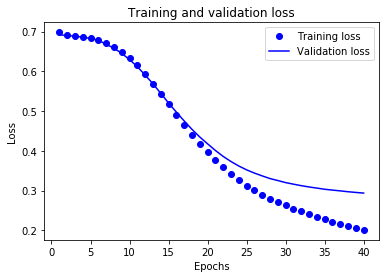

In [34]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

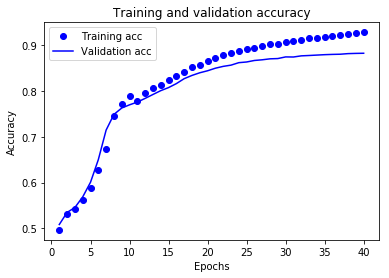

In [33]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## License

In [35]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.